In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly

In [7]:
#Load dataset
data=pd.read_csv("C:\\Users\\27797\\OneDrive\\Documents\\Finance_data.csv")

In [8]:
#print first 5
data.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [9]:
#Display columns
data.columns

Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration',
       'Invest_Monitor', 'Expect', 'Avenue',
       'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
       'Reason_Bonds', 'Reason_FD', 'Source'],
      dtype='object')

In [12]:
data = data.rename(columns={'Duration':'ds','Fixed_Deposits':'y'})
data.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,y,PPF,Gold,...,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source,date
0,Female,34,Yes,1,2,5,3,7,6,4,...,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines,2022-01-31
1,Female,23,Yes,4,3,2,1,5,6,7,...,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants,2022-02-28
2,Male,30,Yes,3,6,4,2,5,1,7,...,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television,2022-03-31
3,Male,22,Yes,2,1,3,7,6,4,5,...,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet,2022-04-30
4,Female,24,No,2,1,3,6,4,5,7,...,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet,2022-05-31


In [14]:
# Selecting the target column
target_column = 'Mutual_Funds'  # Change this to your selected target column
prophet_data = data[['date', target_column]].rename(columns={'date': 'ds', target_column: 'y'})


In [16]:
# Initialize the Prophet model
model = Prophet()


In [17]:
# Fit the model
model.fit(prophet_data)

13:45:07 - cmdstanpy - INFO - Chain [1] start processing
13:45:07 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
# Create a DataFrame to hold predictions for future dates
future = model.make_future_dataframe(periods=12, freq='M')  # Forecast for 12 months


In [21]:
# Make predictions
forecast = model.predict(future)

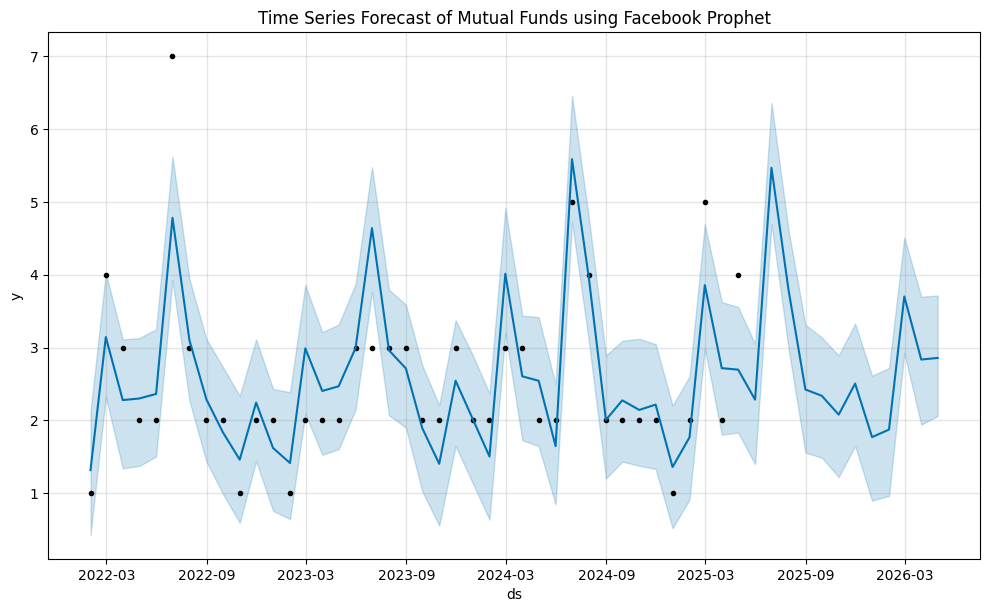

In [22]:
# Plot the results
model.plot(forecast)
plt.title('Time Series Forecast of Mutual Funds using Facebook Prophet')
plt.show()